<a href="https://colab.research.google.com/github/vigneshwaran5803/colab/blob/main/Fake_news_detect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Install dependencies
!pip install scikit-learn pandas numpy matplotlib seaborn gradio


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

import gradio as gr


In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
import zipfile
import os

# Assuming uploaded file is named "dataset.zip"
zip_path = "/content/drive/MyDrive/fake news detecction.zip"
extract_path = "/content/dataset"

# Unzip
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Check extracted files
os.listdir(extract_path)


['WELFake_Dataset.csv']

In [13]:
import pandas as pd

csv_path = os.path.join(extract_path, "/content/dataset/WELFake_Dataset.csv")  # change if your file has a different name
df = pd.read_csv(csv_path)

df.head()


,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Features & Labels
X = df['text']
y = df['label']

# Fill NaN values in the 'text' column with empty strings
X = X.fillna('')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
tfidf_train = vectorizer.fit_transform(X_train)
tfidf_test = vectorizer.transform(X_test)

pac = PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train, y_train)

y_pred = pac.predict(tfidf_test)
acc = accuracy_score(y_test, y_pred)
print(f"✅ Model Accuracy: {round(acc*100,2)}%")

✅ Model Accuracy: 95.86%


In [16]:
import gradio as gr

def predict_news(text):
    transformed_text = vectorizer.transform([text])
    prediction = pac.predict(transformed_text)
    return f"🔎 Prediction: {prediction[0]}"

iface = gr.Interface(
    fn=predict_news,
    inputs=gr.Textbox(lines=5, placeholder="Paste news article here..."),
    outputs="text",
    title="📰 Fake News Detector",
    description="Enter news text to check if it's FAKE or REAL."
)

iface.launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://4df53f6b3374545f7f.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


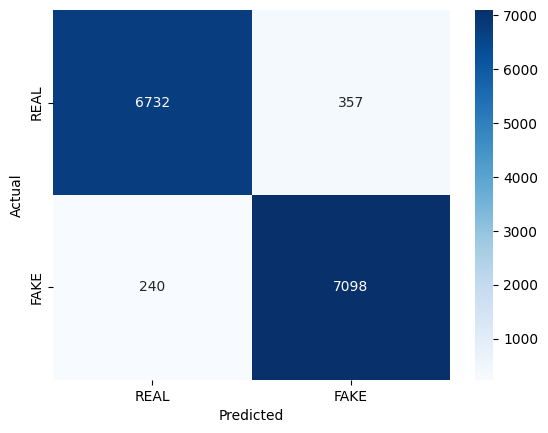

In [18]:
cm = confusion_matrix(y_test, y_pred, labels=[0, 1]) # Use numerical labels 0 and 1

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['REAL','FAKE'], yticklabels=['REAL','FAKE']) # Update tick labels
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [23]:
def predict_news(text):
    transformed_text = vectorizer.transform([text])
    prediction = pac.predict(transformed_text)
    return prediction[0]

# Example
print(predict_news("Donald Trump is the current president of USA"))
print(predict_news("Celebrity endorses miracle weight loss pill!!!"))


1
1


In [20]:
df[['text','label']].head(20)



,text,label
0,No comment is expected from Barack Obama Membe...,1
1,Did they post their votes for Hillary already?,1
2,"Now, most of the demonstrators gathered last ...",1
3,A dozen politically active pastors came here f...,0
4,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
5,All we can say on this one is it s about time ...,1
6,DR. BEN CARSON TELLS THE STORY OF WHAT HAPPENE...,1
7,,1
8,"The owner of the Ringling Bar, located south o...",1
9,"FILE – In this Sept. 15, 2005 file photo, the ...",1
